In [1]:
# Import Libraries and Data Loading

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import kagglehub
path = kagglehub.dataset_download("bumba5341/advertisingcsv")
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
file_path = os.path.join(path, csv_files[0])

100%|██████████| 2.26k/2.26k [00:00<00:00, 3.25MB/s]

Extracting files...


In [2]:
# Data Loading and Overview

df = pd.read_csv(os.path.join(path, [f for f in os.listdir(path) if f.endswith('.csv')][0]))
print(df.head(), df.tail(), df.info(), df.isnull().sum(), df.describe(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   

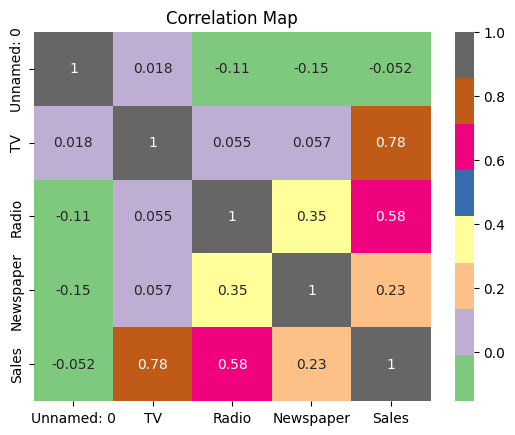

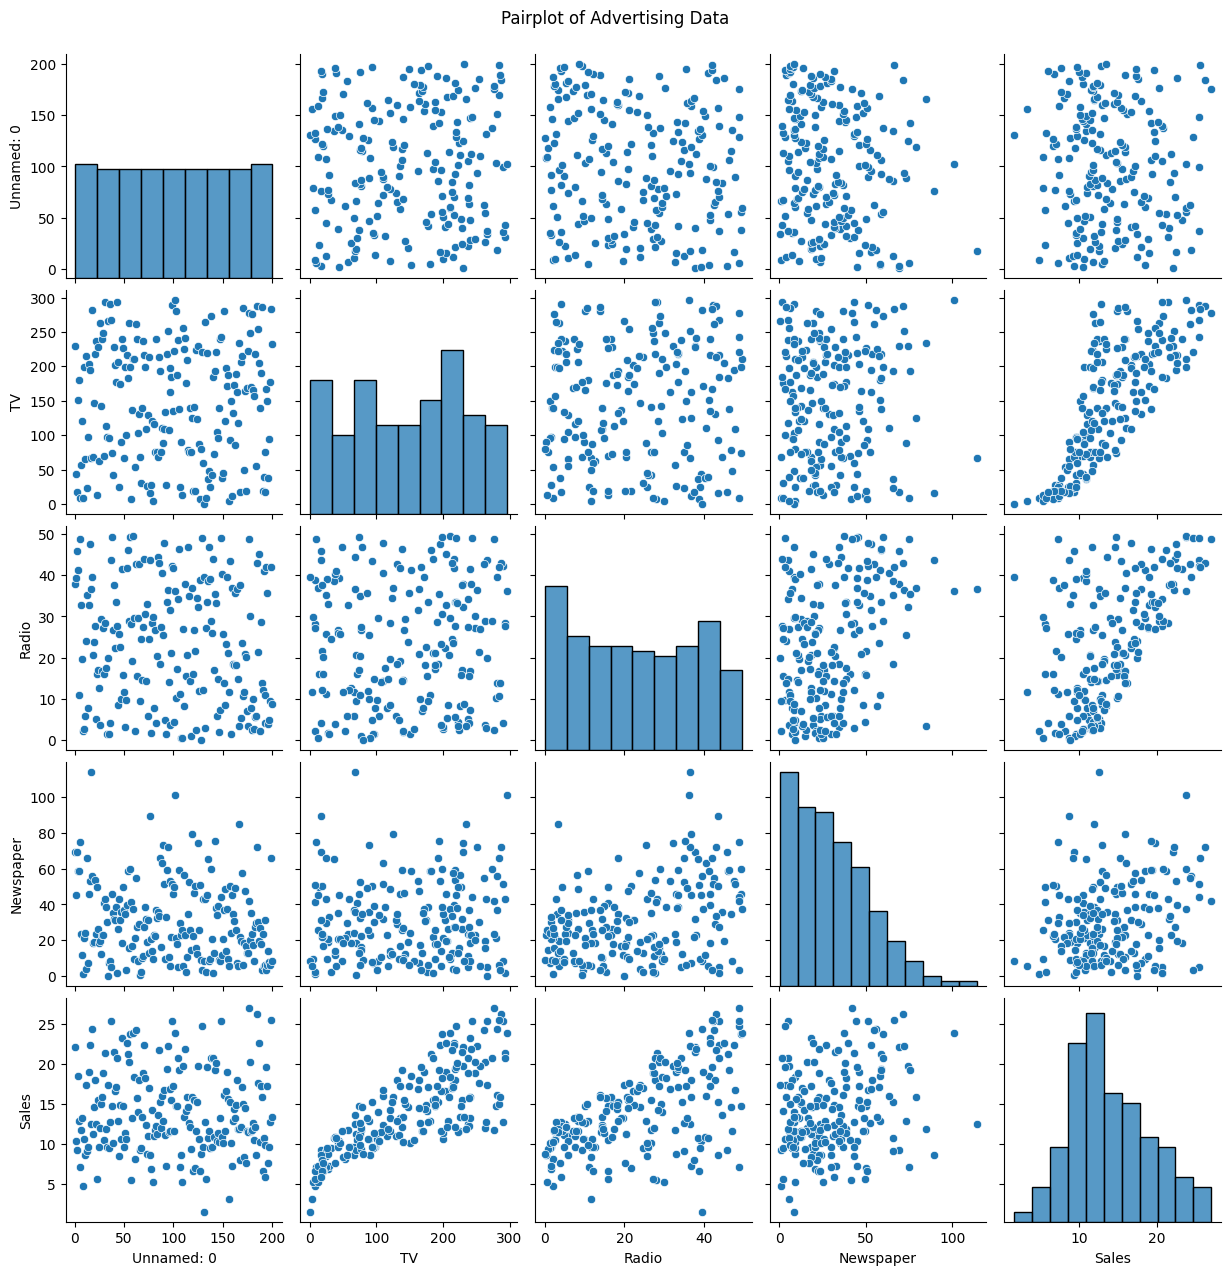

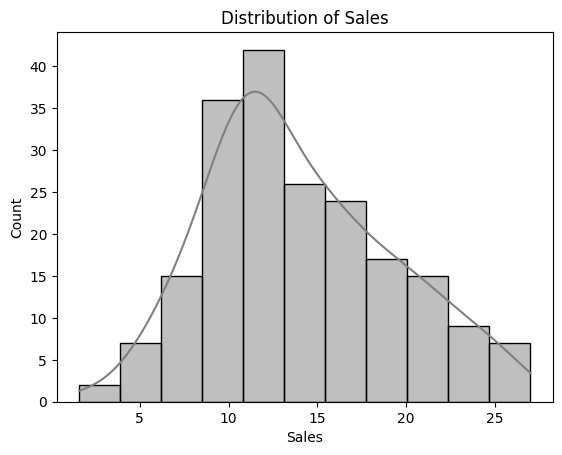

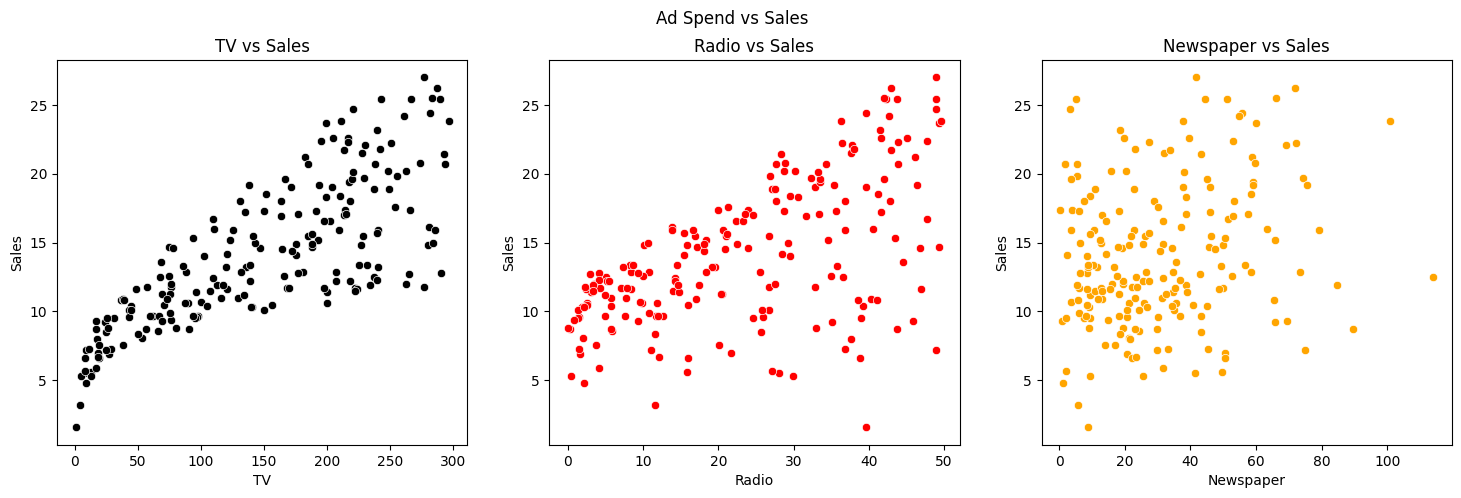

In [3]:
# Exploratory Data Analysis plots

sns.heatmap(df.corr(), annot=True, cmap="Accent"); plt.title("Correlation Map"); plt.show()
sns.pairplot(df); plt.suptitle("Pairplot of Advertising Data", y=1.02); plt.show()
sns.histplot(df['Sales'], kde=True, color="grey"); plt.title("Distribution of Sales"); plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for ax, col, color in zip(axs, ['TV', 'Radio', 'Newspaper'], ['black', 'red', 'orange']):
    sns.scatterplot(data=df, x=col, y='Sales', ax=ax, color=color); ax.set_title(f"{col} vs Sales")
plt.suptitle("Ad Spend vs Sales"); plt.show()

In [4]:
# Data Preparation and Feature Selection

df.fillna(df.mean(numeric_only=True), inplace=True)
X, y = df.drop("Sales", axis=1), df["Sales"]

In [5]:
# Train-Test Split and Predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

MSE: 3.20
RMSE: 1.79
R² Score: 0.90


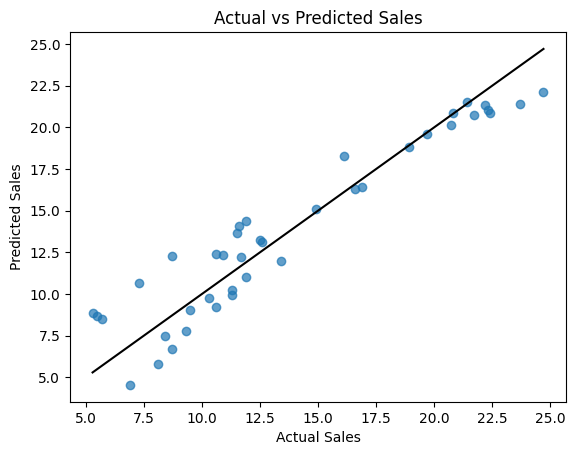

In [6]:
# Evaluation and Visualization

mse, rmse, r2 = mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

plt.scatter(y_test, y_pred, alpha=0.7); plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black')
plt.xlabel("Actual Sales"); plt.ylabel("Predicted Sales"); plt.title("Actual vs Predicted Sales"); plt.show()

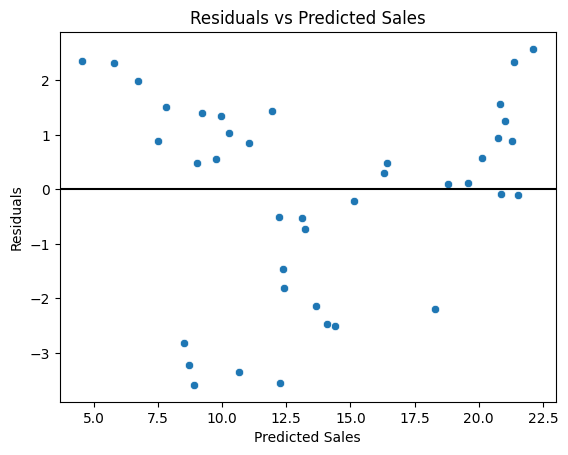

In [7]:
sns.scatterplot(x=y_pred, y=y_test - y_pred); plt.axhline(0, color='black', ls='-')
plt.title("Residuals vs Predicted Sales"); plt.xlabel("Predicted Sales"); plt.ylabel("Residuals"); plt.show()

In [10]:
# Actionable Insights

top = {'Channel': 'Radio'}
low = {'Channel': 'Newspaper'}

print(f"Invest more in '{top['Channel']}' (highest impact)")
print(f"Reduce budget on '{low['Channel']}' (lowest impact)")
print("Focus on top impact channels for optimized sales.")

Invest more in 'Radio' (highest impact)
Reduce budget on 'Newspaper' (lowest impact)
Focus on top impact channels for optimized sales.
